In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [51]:
exports = pd.read_excel('Export_py.xlsx')
imports = pd.read_excel('Imports_py.xlsx')
print(imports.head(3))

         HST       2018       2019       2020       2021       2022  \
0  HST391710  256320198  323774665  265980166  280450615  341301609   
1  HST391721  124672540  103520618   88084681   79504722   87393953   
2  HST391722    7352043   10283245   12219734   11561856   15156507   

        2023       2024  
0  425006786  402487481  
1  108116256  107483681  
2   12834625   12850881  


In [53]:
# Merge Exports and Imports by HS_Code
data = pd.merge(exports, imports, on='HST', suffixes=('_export', '_import'))
print(data.head(3))

         HST  2018_export  2019_export  2020_export  2021_export  2022_export  \
0  HST391710     79654208     66442420     64230162     74306718     84986652   
1  HST391721    390230392    304596339    347346536    420620416    675539991   
2  HST391722     22799738     10043634      5725102     13540962     21287198   

   2023_export  2024_export  2018_import  2019_import  2020_import  \
0    126013290    134108555    256320198    323774665    265980166   
1    657525012    638051380    124672540    103520618     88084681   
2     19906308     15706792      7352043     10283245     12219734   

   2021_import  2022_import  2023_import  2024_import  
0    280450615    341301609    425006786    402487481  
1     79504722     87393953    108116256    107483681  
2     11561856     15156507     12834625     12850881  


D:\Users\BMayongo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


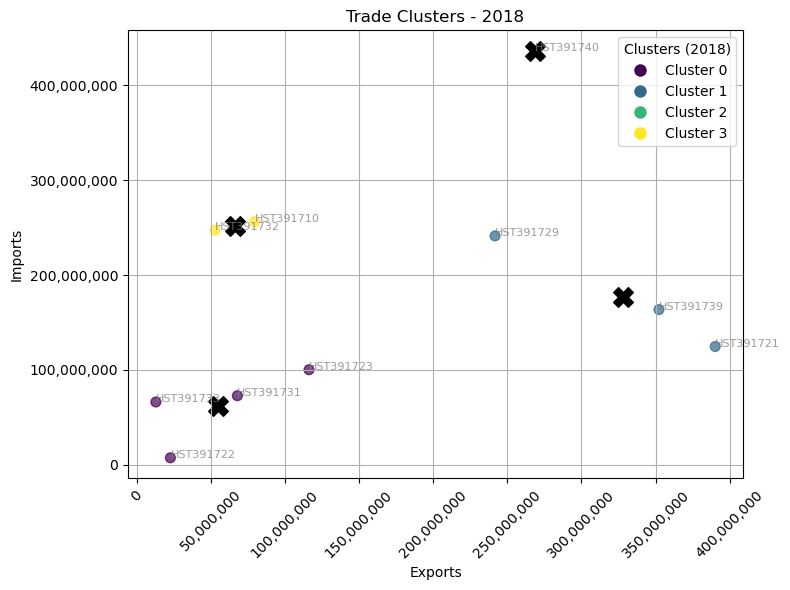

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
from scipy.spatial.distance import cdist
import numpy as np

# Store reference centroids from the first year
reference_centroids = None

# List of years to loop through
years = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']

for year in years:
    export_col = f"{year}_export"
    import_col = f"{year}_import"

    #extracting data
    year_data = data[[export_col, import_col]].copy()
    
    # Run KMeans clustering (e.g., 3 clusters)
    kmeans = KMeans(n_clusters=4, random_state=0)
    clusters = kmeans.fit_predict(year_data)
    centers = kmeans.cluster_centers_

    # Match current clusters to reference centroids for consistency
    if reference_centroids is None:
        reference_centroids = centers  # Store first year's centroids as reference
    else:
        # Compute distance between current and reference centroids
        distance_matrix = cdist(centers, reference_centroids)
        label_mapping = np.argmin(distance_matrix, axis=1)  # map current -> reference
        clusters = np.array([label_mapping[label] for label in clusters])  # relabel clusters
    
    #  Plot (inside loop)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        data[export_col],
        data[import_col],
        c=clusters,
        cmap='viridis',
        s=50,
        alpha=0.7
    )

    # Remove scientific notation
    from matplotlib.ticker import ScalarFormatter
    plt.ticklabel_format(style='plain', axis='both')
    plt.gca().get_xaxis().get_offset_text().set_visible(False)
    plt.gca().get_yaxis().get_offset_text().set_visible(False)

    #  Rotate x-axis labels
    plt.xticks(rotation=45)

    #  Format ticks with commas
    import matplotlib.ticker as mticker
    plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{int(y):,}'))

    # Add centroids (inside loop)
    centers = kmeans.cluster_centers_
    plt.scatter(
        centers[:, 0], centers[:, 1],
        c='black', s=200, marker='X', label='Centroids'
    )
    # Show centroid values on the plot
    #for i, (x, y) in enumerate(centers):
            # plt.text(x, y, f'({x:.2f}, {y:.2f})', fontsize=9, fontweight='bold', 
            #color='black', ha='center', va='center', 
            # bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.3'))

    # Label each data point with its HScode
    for i in range(len(data)):
          x = data.loc[i, export_col]
          y = data.loc[i, import_col]
          hscode = data.loc[i, 'HST']
          plt.text(x, y, str(hscode), fontsize=8, alpha=0.8, color='gray')
    
    # 3f. Labels, grid, title (inside loop)
    plt.title(f"HS Code Clusters for {year}")
    plt.xlabel(f"Exports ({year})")
    plt.ylabel(f"Imports ({year})")
    plt.grid(True)
    
    # Legend (inside loop)
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
               markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
        for i in range(4)
    ]
    #legend_elements.append(Line2D([0], [0], marker='X', color='black', label='Centroids', markersize=10))
    plt.legend(handles=legend_elements, title=f"Clusters ({year})")
    
     # Titles and labels
    plt.title(f"Trade Clusters - {year}")
    plt.xlabel('Exports')
    plt.ylabel('Imports')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



